In [ ]:
pip install wikipedia

In [ ]:
pip install scikit-network

In [ ]:
##Using Wikipedia Webcrawler

In [1]:
import wikipedia as w
import pandas as pd

from time import sleep

In [2]:
def search_wiki(search_list):

    origin_pages = []
    found_pages = []

    # later, we will drop these to keep the properly named page in the network

    for search in search_list:

        print('searching topic: {}'.format(search))
        
        try:
            #page = w.page(search)
            #search_results = page.links
            search_results = w.search(search)

            for found_page in search_results:

                origin_pages.append(search)
                found_pages.append(found_page)

        except:
            
            print('not found')
            
        sleep(0.3)
        
    return origin_pages, found_pages

In [3]:
def create_edgelist_df(seed_searches, iterations=2):

    completed = []
    sources = []
    targets = []

    for i in range(iterations):
        
        print('starting iteration: {}'.format(i))
        print()

        if i == 0:

            search_list = seed_searches

        origin_pages, found_pages = search_wiki(search_list)

        completed.extend(origin_pages)
        sources.extend(origin_pages)
        targets.extend(found_pages)

        search_list = sorted(set([t for t in targets if t not in completed]))
        print(len(search_list))
        print()
        print(search_list)
        print()
        
    df = pd.DataFrame(list(zip(sources, targets)))
    df.columns = ['source', 'target']
                  
    return df

In [4]:
seed_searches = ['Cleopatra']

df = create_edgelist_df(seed_searches, iterations=4) # keep it low (1-3) or this will take forever

starting iteration: 0

searching topic: Cleopatra
9

['Antony and Cleopatra', 'Cleopatra (1963 film)', 'Cleopatra (disambiguation)', 'Cleopatra II', 'Cleopatra III', 'Cleopatra Selene II', 'Cleopatra V', 'Death of Cleopatra', 'Ethnicity of Cleopatra']

starting iteration: 1

searching topic: Antony and Cleopatra
searching topic: Cleopatra (1963 film)
searching topic: Cleopatra (disambiguation)
searching topic: Cleopatra II
searching topic: Cleopatra III
searching topic: Cleopatra Selene II
searching topic: Cleopatra V
searching topic: Death of Cleopatra
searching topic: Ethnicity of Cleopatra
44

['1963 in film', 'African Queens (TV series)', 'Alexander Helios', 'Ancient Egyptian race controversy', 'Antony and Cleopatra (1972 film)', 'Antony and Cleopatra (disambiguation)', 'Arsinoe IV', 'Asterix and Cleopatra', 'Battle of Actium', 'Berenice III', 'Caesar and Cleopatra', 'Cleo', 'Cleopatra (1963 soundtrack)', 'Cleopatra (film) (disambiguation)', 'Cleopatra I Syra', 'Cleopatra Jones', '

In [5]:
df.shape

(2545, 2)

In [6]:
df.head()

,source,target
0,Cleopatra,Cleopatra
1,Cleopatra,Cleopatra (disambiguation)
2,Cleopatra,Death of Cleopatra
3,Cleopatra,Antony and Cleopatra
4,Cleopatra,Ethnicity of Cleopatra


In [7]:
outfile = 'desktop/cleopatra_edgelist.csv'

df.to_csv(outfile, index=False)

In [8]:
# verify the outfile looks good

df = pd.read_csv(outfile)
df.head()

,source,target
0,Cleopatra,Cleopatra
1,Cleopatra,Cleopatra (disambiguation)
2,Cleopatra,Death of Cleopatra
3,Cleopatra,Antony and Cleopatra
4,Cleopatra,Ethnicity of Cleopatra


In [9]:
df.shape

(2545, 2)

In [10]:
### Analysis Part 2

In [11]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [12]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [13]:
data = r'desktop/cleopatra_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,Cleopatra,Cleopatra
1,Cleopatra,Cleopatra (disambiguation)
2,Cleopatra,Death of Cleopatra
3,Cleopatra,Antony and Cleopatra
4,Cleopatra,Ethnicity of Cleopatra


In [14]:
G = nx.from_pandas_edgelist(df)

# drop the seed nodes; we will have proper names from pages found
seed_nodes = ['Comedian', 'Gallagher (comedian)', 'Comedian (disambiguation)', 'List of British comedians']
G.remove_nodes_from(seed_nodes)

In [15]:
print(G)

Graph with 1479 nodes and 2361 edges


In [16]:
import networkx as nx

In [17]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

  import numpy as np
  from IPython.display import SVG
  from sknetwork.visualization import svg_graph
  from sknetwork.data import Bunch
  from sknetwork.ranking import PageRank
  from scipy.sparse import csr_matrix

  adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
  adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
  names = np.array(list(G.nodes))
  graph = Bunch()
  graph.adjacency = adjacency
  graph.names = np.array(names)
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency)

  if show_names:
    image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
  else:
    image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
  return SVG(image)

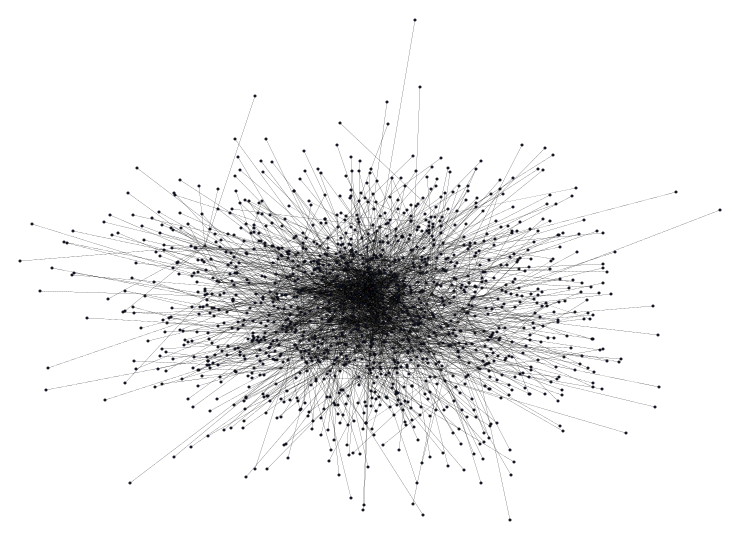

In [18]:
draw_graph(G, node_size=1, show_names=False, edge_width=0.1)

In [19]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Cleopatra,0.005733
Hansi Kürsch,0.003526
Pegasus (constellation),0.003373
Mark Anthony,0.003357
Rhea,0.003347
Blaxploitation,0.003342
The Song of Hiawatha,0.003295
The Birds (film),0.003286
All in the Family,0.003237
Sistas (TV series),0.003237


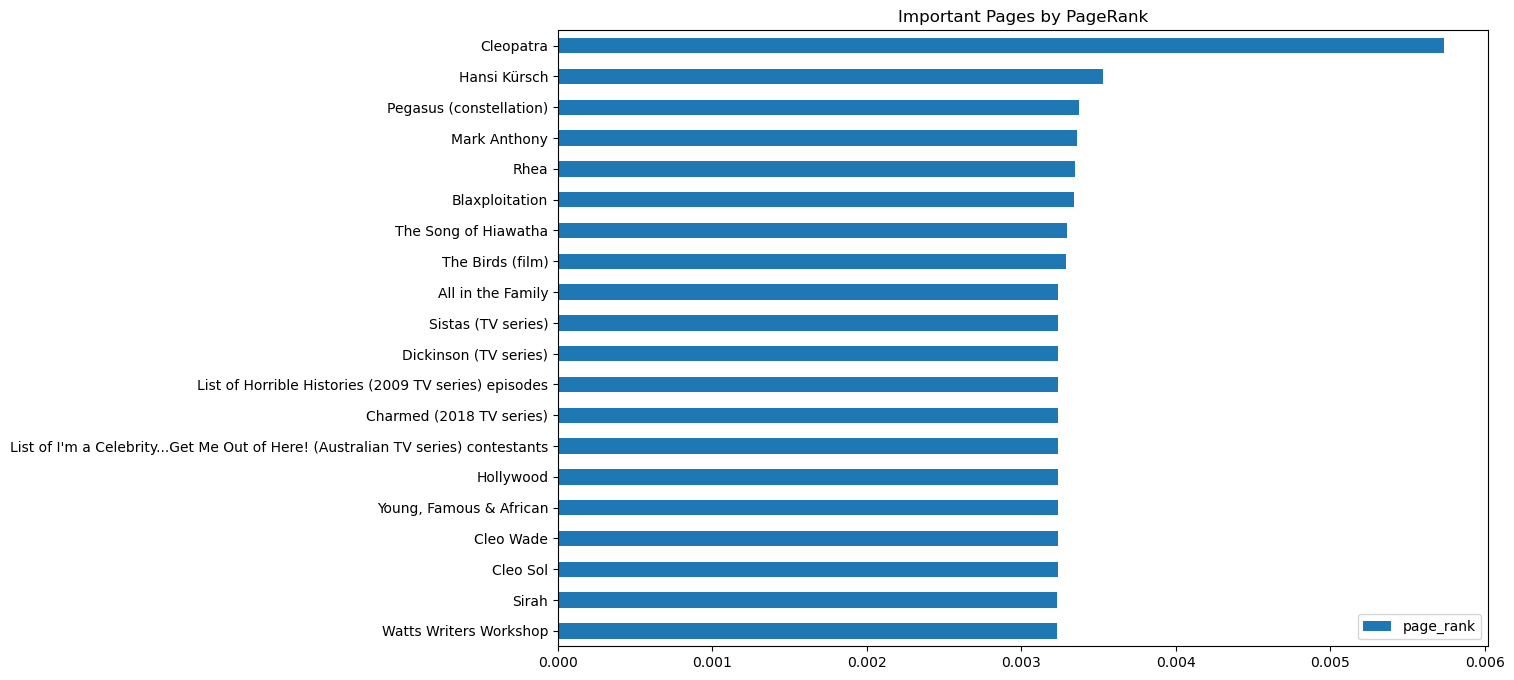

In [20]:
title = 'Important Pages by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

In [21]:
top_nodes = pr_df.head(20).index.values

In [22]:
top_nodes[0]

'Cleopatra'

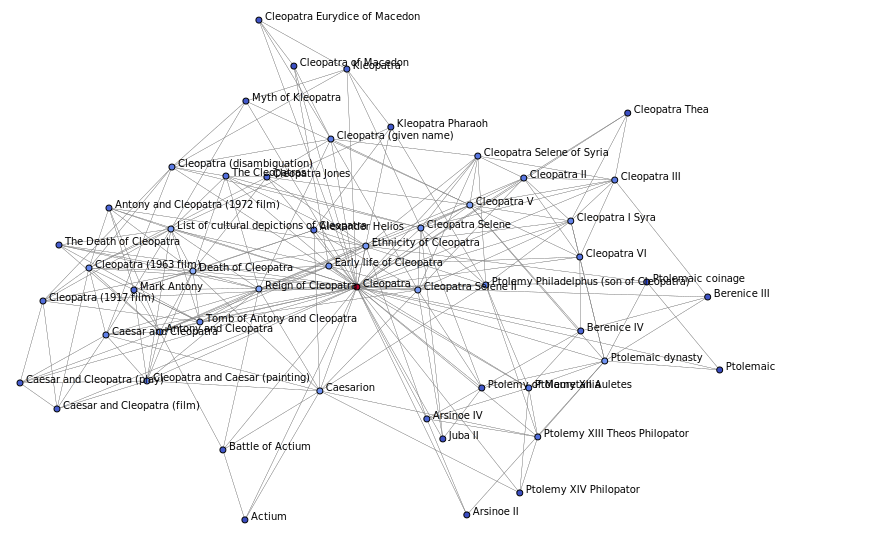

In [23]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [25]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['Actium',
 'Alexander Helios',
 'Antony and Cleopatra',
 'Antony and Cleopatra (1972 film)',
 'Arsinoe II',
 'Arsinoe IV',
 'Battle of Actium',
 'Berenice III',
 'Berenice IV',
 'Caesar and Cleopatra',
 'Caesar and Cleopatra (film)',
 'Caesar and Cleopatra (play)',
 'Caesarion',
 'Cleopatra',
 'Cleopatra (1917 film)',
 'Cleopatra (1963 film)',
 'Cleopatra (disambiguation)',
 'Cleopatra (given name)',
 'Cleopatra Eurydice of Macedon',
 'Cleopatra I Syra',
 'Cleopatra II',
 'Cleopatra III',
 'Cleopatra Jones',
 'Cleopatra Selene',
 'Cleopatra Selene II',
 'Cleopatra Selene of Syria',
 'Cleopatra Thea',
 'Cleopatra V',
 'Cleopatra VI',
 'Cleopatra and Caesar (painting)',
 'Cleopatra of Macedon',
 'Death of Cleopatra',
 'Early life of Cleopatra',
 'Ethnicity of Cleopatra',
 'Juba II',
 'Kleopatra',
 'Kleopatra Pharaoh',
 'List of cultural depictions of Cleopatra',
 'Mark Antony',
 'Myth of Kleopatra',
 'Ptolemaic',
 'Ptolemaic coinage',
 'Ptolemaic dynasty',
 'Ptolemy Philadelphus (son of

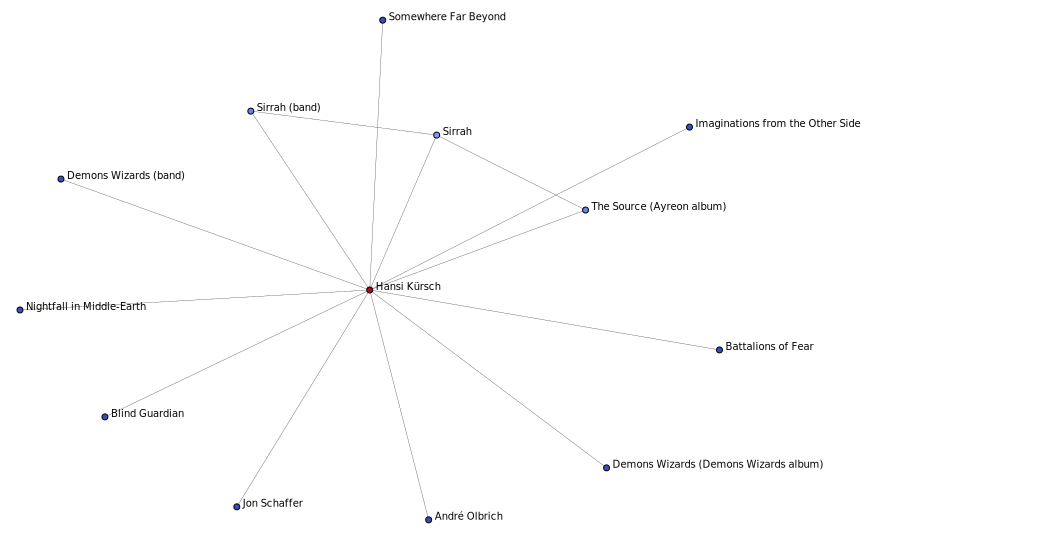

In [26]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

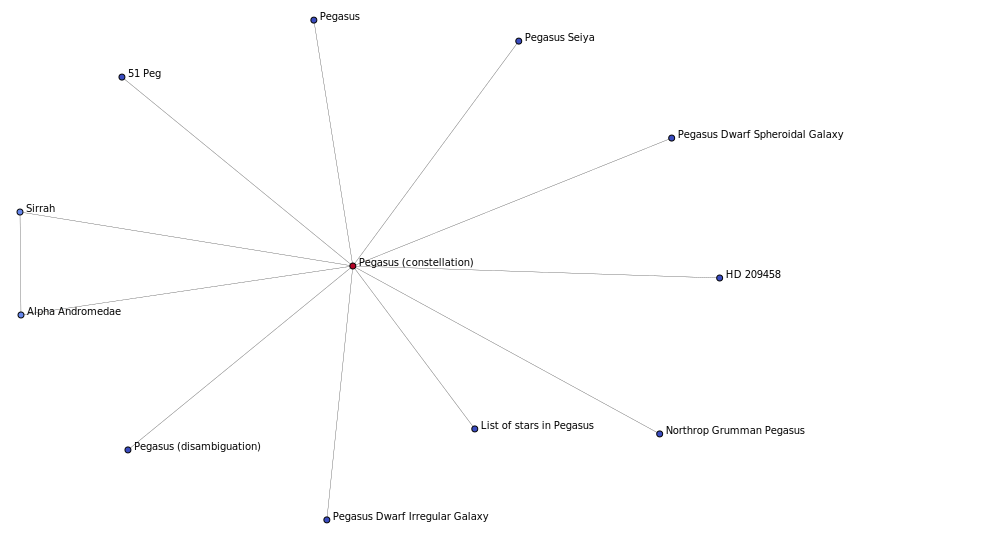

In [27]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

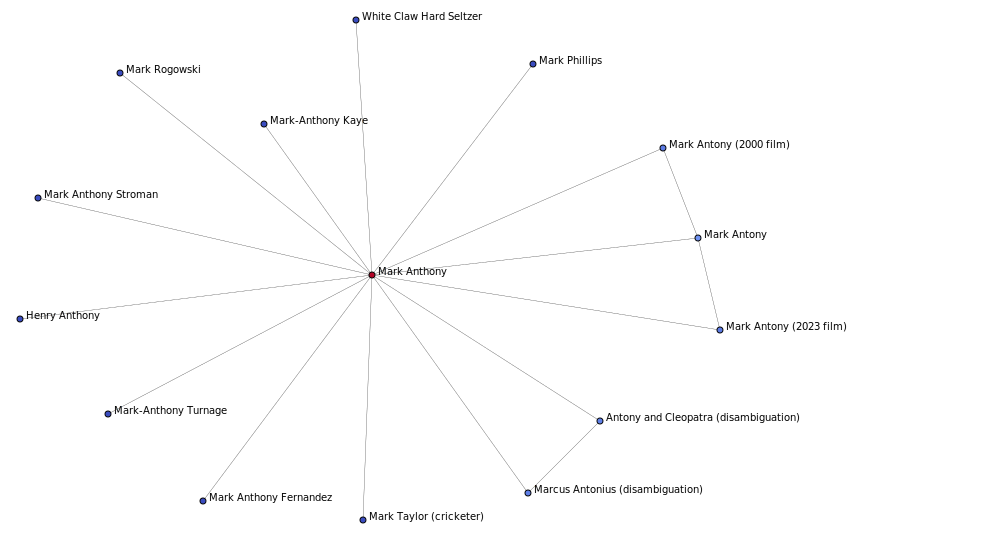

In [28]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

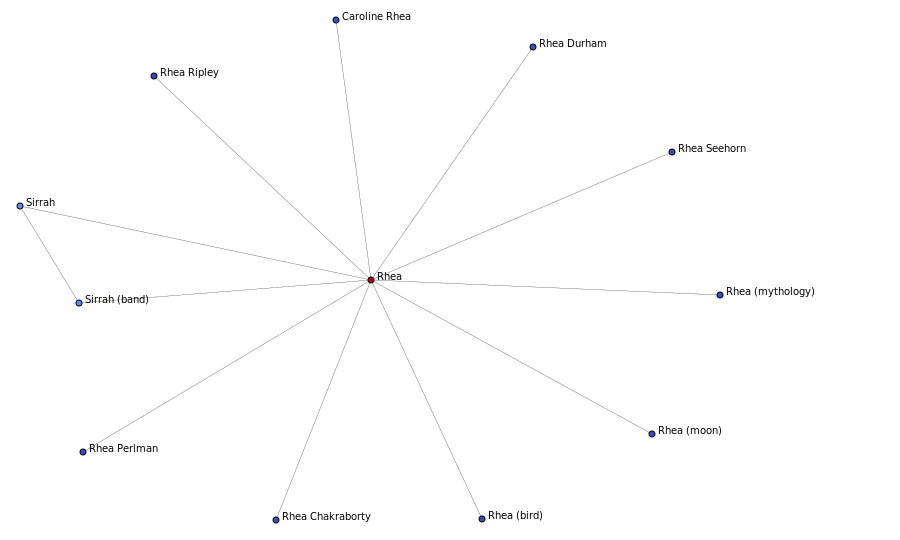

In [29]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

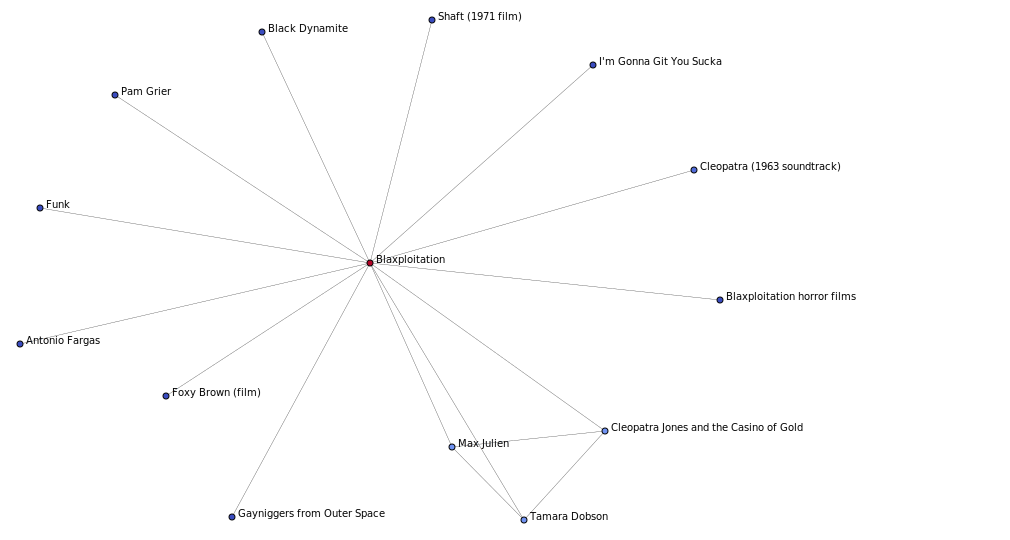

In [30]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

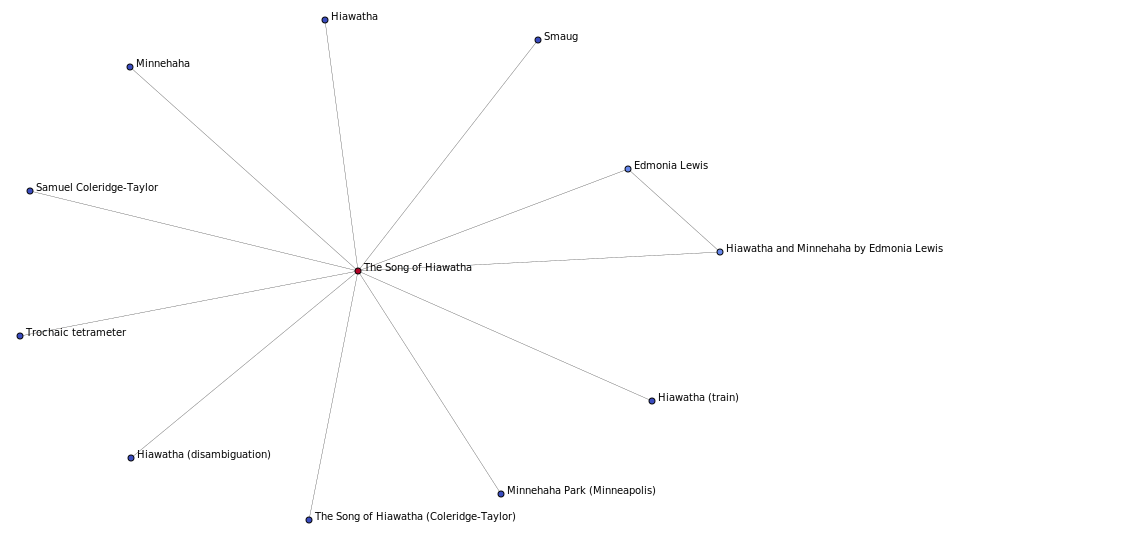

In [31]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

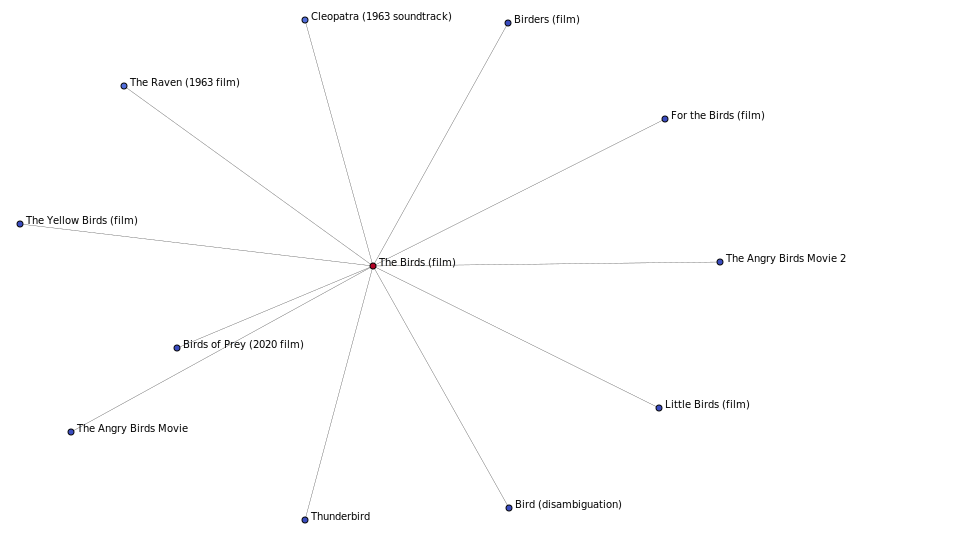

In [32]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [ ]:
##Community Detection

In [33]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 
    cmap = cm.get_cmap('jet', max(partition.values()) + 1) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [34]:
!pip install python-louvain
from community import community_louvain

In [35]:
# identify communities; set resolution to 0.01 for smaller groups and 1 for larger groups, etc
# play with the number to get communities to the size you want them, or leave it at the default

partition = community_louvain.best_partition(G, resolution=0.1, random_state=1337) 

In [37]:
community_df = pd.DataFrame().from_dict(partition, orient='index')
community_df.reset_index(inplace=True)
community_df.columns = ['node', 'community']

# remove junk; identify relevant communities
##community_df = community_df[community_df['node'].str.contains('cleopatra|antony|kleopatra|ceasar')]

community_df['community'].value_counts()[0:20]

community
156    44
102    31
100    19
46     15
15     13
33     12
103    10
139    10
177    10
88     10
87     10
85     10
178    10
106    10
84     10
179    10
180    10
14     10
17     10
77     10
Name: count, dtype: int64

In [38]:
comm_idx = community_df['community'].value_counts()[0:20].index.values
comm_idx

array([156, 102, 100,  46,  15,  33, 103, 139, 177,  88,  87,  85, 178,
       106,  84, 179, 180,  14,  17,  77], dtype=int64)

In [ ]:
##Exploring Communities

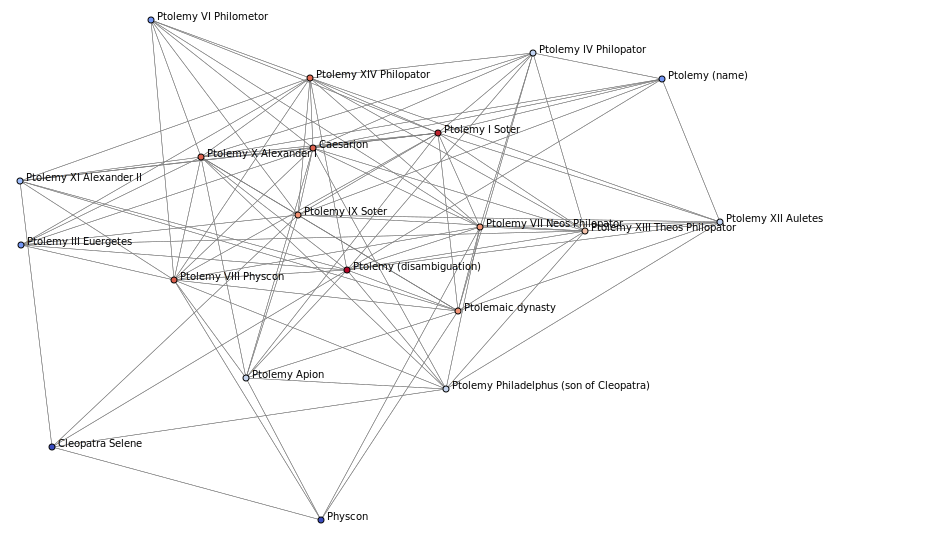

In [40]:
nodes = community_df[community_df['community']==comm_idx[0]]['node'].values

G_comm = G.subgraph(nodes)
G_net_main = G_comm.copy() # we will run community detection off of this at the end
G.remove_edges_from(nx.selfloop_edges(G))

draw_graph(nx.k_core(G_comm, 5), show_names=True, node_size=3)

In [41]:
netsci_nodes = [n for n in sorted(G_net_main.nodes)]
[print(n) for n in netsci_nodes]

116 BC
Alexander Helios
Arsinoe IV
Berenice III
Caesarion
Cleopatra Selene
Conall Collamrach
Crimthann Coscrach
Donations of Alexandria
Drusilla (daughter of Ptolemy of Mauretania)
Epigonus (disambiguation)
Gabiniani
Geocentric model
Library of Alexandria
Mediolanum (disambiguation)
Mount Ptolemy
Nicomedes IV of Bithynia
Physcon
Ptolemaic
Ptolemaic Kingdom
Ptolemaic Terrascope
Ptolemaic dynasty
Ptolemais
Ptolemy
Ptolemy (disambiguation)
Ptolemy (name)
Ptolemy Apion
Ptolemy Ceraunus
Ptolemy I Soter
Ptolemy III Euergetes
Ptolemy IV Philopator
Ptolemy IX Soter
Ptolemy Philadelphus (son of Cleopatra)
Ptolemy VI Philometor
Ptolemy VII Neos Philopator
Ptolemy VIII Physcon
Ptolemy X Alexander I
Ptolemy XI Alexander II
Ptolemy XII Auletes
Ptolemy XIII Theos Philopator
Ptolemy XIV Philopator
Ptolemy of Mauretania
Ptolemy's world map
Tolomeo (disambiguation)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
##More Communities

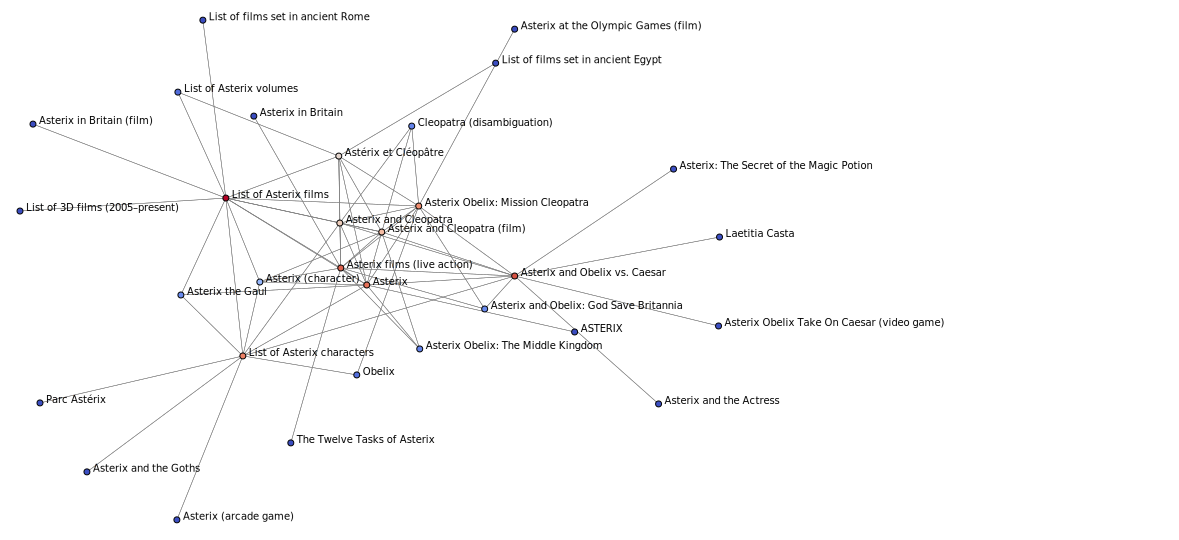

In [42]:
nodes = community_df[community_df['community']==comm_idx[1]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [43]:
[print(n) for n in sorted(G_comm.nodes)]

ASTERIX
Asterix
Asterix & Obelix Take On Caesar (video game)
Asterix & Obelix: Mission Cleopatra
Asterix & Obelix: The Middle Kingdom
Asterix (arcade game)
Asterix (character)
Asterix and Cleopatra
Asterix and Cleopatra (film)
Asterix and Obelix vs. Caesar
Asterix and Obelix: God Save Britannia
Asterix and the Actress
Asterix and the Goths
Asterix at the Olympic Games (film)
Asterix films (live action)
Asterix in Britain
Asterix in Britain (film)
Asterix the Gaul
Asterix: The Secret of the Magic Potion
Astérix et Cléopâtre
Cleopatra (disambiguation)
Laetitia Casta
List of 3D films (2005–present)
List of Asterix characters
List of Asterix films
List of Asterix volumes
List of films set in ancient Egypt
List of films set in ancient Rome
Obelix
Parc Astérix
The Twelve Tasks of Asterix


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

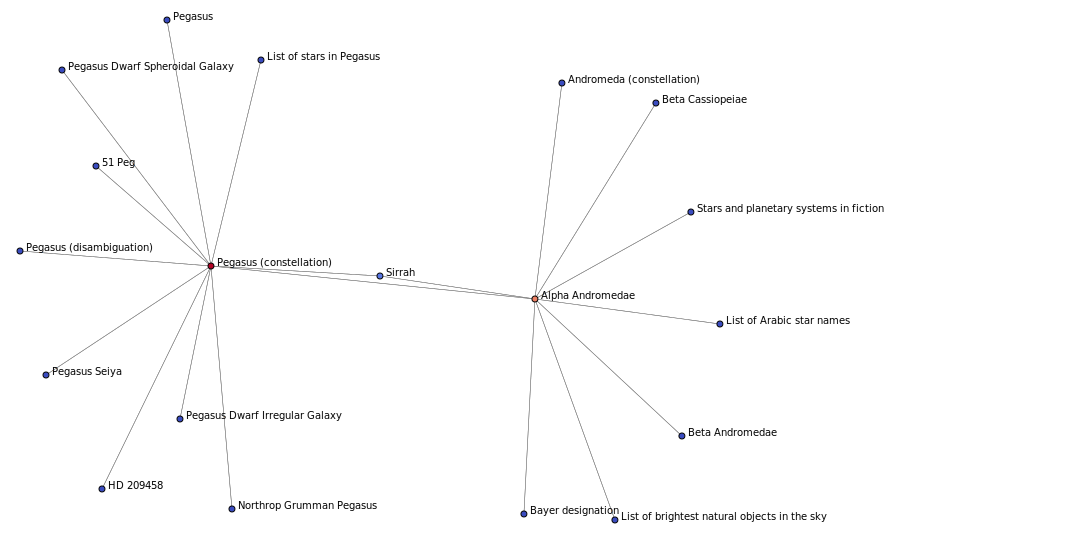

In [44]:
nodes = community_df[community_df['community']==comm_idx[2]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [45]:
[print(n) for n in sorted(G_comm.nodes)]

51 Peg
Alpha Andromedae
Andromeda (constellation)
Bayer designation
Beta Andromedae
Beta Cassiopeiae
HD 209458
List of Arabic star names
List of brightest natural objects in the sky
List of stars in Pegasus
Northrop Grumman Pegasus
Pegasus
Pegasus (constellation)
Pegasus (disambiguation)
Pegasus Dwarf Irregular Galaxy
Pegasus Dwarf Spheroidal Galaxy
Pegasus Seiya
Sirrah
Stars and planetary systems in fiction


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

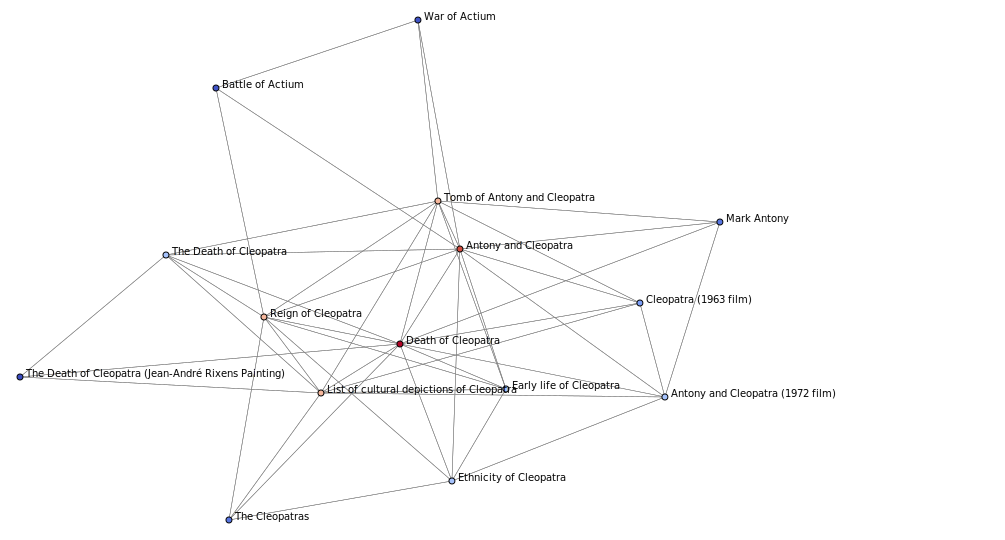

In [46]:
nodes = community_df[community_df['community']==comm_idx[3]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [47]:
[print(n) for n in sorted(G_comm.nodes)]

Antony and Cleopatra
Antony and Cleopatra (1972 film)
Battle of Actium
Cleopatra (1963 film)
Death of Cleopatra
Early life of Cleopatra
Ethnicity of Cleopatra
List of cultural depictions of Cleopatra
Mark Antony
Reign of Cleopatra
The Cleopatras
The Death of Cleopatra
The Death of Cleopatra (Jean-André Rixens Painting)
Tomb of Antony and Cleopatra
War of Actium


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [48]:
nx.betweenness_centrality(G)

{'Cleopatra': 0.25883497005505823,
 'Cleopatra (disambiguation)': 0.29379125993297966,
 'Death of Cleopatra': 0.12654517842258234,
 'Antony and Cleopatra': 0.0408034016245048,
 'Ethnicity of Cleopatra': 0.11128994969834227,
 'Cleopatra (1963 film)': 0.16403528637040876,
 'Cleopatra Selene II': 0.0524341334239236,
 'Cleopatra II': 0.007495358944851171,
 'Cleopatra V': 0.0037345936743250862,
 'Cleopatra III': 0.0005592975886346579,
 'Tomb of Antony and Cleopatra': 0.020113933817970192,
 'Reign of Cleopatra': 0.06819536623759818,
 'Mark Antony': 0.07257042862993796,
 'Antony and Cleopatra (1972 film)': 0.03994644240229105,
 'Battle of Actium': 0.049923090891500155,
 'War of Actium': 0.052359315432171545,
 'Cleopatra (1963 soundtrack)': 0.08302138622525808,
 '1963 in film': 0.08031360261210208,
 'List of American films of 1963': 0.05773752303132037,
 'Cleopatra Jones': 0.04757277509498192,
 'Asterix and Cleopatra': 0.024296302761393718,
 'Cleopatra Selene': 0.0550359484913729,
 'Antony and